# File to explore time dependant data and create (preliminary plots)

## Remove spikes in SEDs and images

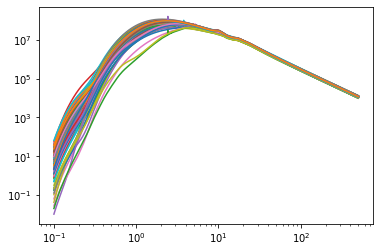

In [2]:
# Remove spikes from SED
# Merge SEDs with different seeds
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import os

folder = '../r3dresults/st28gm06n052_timedep'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for phase in phases:
    for angle in angles:
        a,b = a3d.remove_sedspikes(
                paths = [
                            f'{folder}_1/{phase}/spectrum_{angle}.out',
                            f'{folder}_2/{phase}/spectrum_{angle}.out',
                        ],
                save=True
            )
        os.system(f'mv ../spectrum.out {folder}_nospikes/{phase}/spectrum_{angle}.out')

        plt.plot(a,b)
        plt.xscale('log')
        plt.yscale('log')



In [3]:
# Remove spikes from Images
import analyze_r3d_functions as a3d
import os

folder = '../r3dresults/st28gm06n052_timedep'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
images = [
    'image_i000_phi000_01um.out',
    'image_i000_phi000_10um.out',
    'image_i090_phi000_01um.out',
    'image_i090_phi000_10um.out',
    'image_i090_phi090_01um.out',
    'image_i090_phi090_10um.out',
    'image_i090_phi270_01um.out',
    'image_i090_phi270_10um.out',
    'image_i180_phi000_01um.out',
    'image_i180_phi000_10um.out',
    'image_i270_phi000_01um.out',
    'image_i270_phi000_10um.out'
]
for phase in phases:
    print(f'Doing phase {phase}')
    for image in images:

        image1d = a3d.remove_imagespikes(
            folders = [
                f'{folder}_1/{phase}/',
                f'{folder}_2/{phase}/',
            ],
            imagefilename = image
        )
        os.system(f'mv ../{image} {folder}_nospikes/{phase}/')
